In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

In [2]:
X1,X2,y1,y2 = [[] for _ in range(25)],[[] for _ in range(25)],[[] for _ in range(25)],[[] for _ in range(25)]

def load_data(path):
    i_data=pd.read_csv(path,header = None,sep = '\t')
    np_data = np.array(i_data)
    max_d = np.max(np_data[:,1])
    np_data[:,1] = np_data[:,1]/max_d
    return np_data

X1,X2 = [[] for _ in range(25)],[[] for _ in range(25)]
for i in range(25):
    X1[i] = load_data('1/001-20V-{}.txt'.format(i+1))
    X2[i] = load_data("2/110-20V-{}.txt".format(i+1))

'\nlx,rx = [[] for _ in range(25)],[[] for _ in range(25)]\nfor i in range(25):\n'

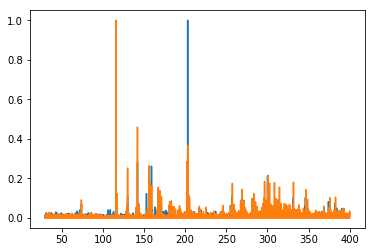

In [3]:
'''
plt.title("demo_1")
plt.plot(X2[1][:,0],'.')
'''
i = 1
plt.plot(X2[i][:,0],X2[i][:,1],X1[i+2][:,0],X1[i+2][:,1])
'''
lx,rx = [[] for _ in range(25)],[[] for _ in range(25)]
for i in range(25):
''' 

In [4]:
def find_countour(ddata):
    ddata = np.array(ddata)
    N = ddata.shape[0]
    outd = np.zeros(ddata.shape)
    perch = np.percentile(ddata,99.9)
    percl = np.percentile(ddata,0.1)
    for i in range(N-1):
        '''
        if i>0:
            outd[i] = ddata[i-1] - 2*ddata[i] + ddata[i+1]
        else:
            outd[i] = ddata[i+1] - ddata[i]
        '''
        outd[i] = ddata[i] - ddata[i+1]
        '''
        if outd[i]<perch and outd[i]>percl:
            outd[i] = 0
        '''
    return outd
for i in range(25):
    freq = np.power(np.abs(np.fft.fft(X1[i][:,1])),2)
    freqperc = np.percentile(freq, 99)
    X1[i][:,1] = freq*(freq<freqperc)
    freq = np.power(np.abs(np.fft.fft(X2[i][:,1])),2)
    freqperc = np.percentile(freq, 99)
    X2[i][:,1] = freq*(freq<freqperc)

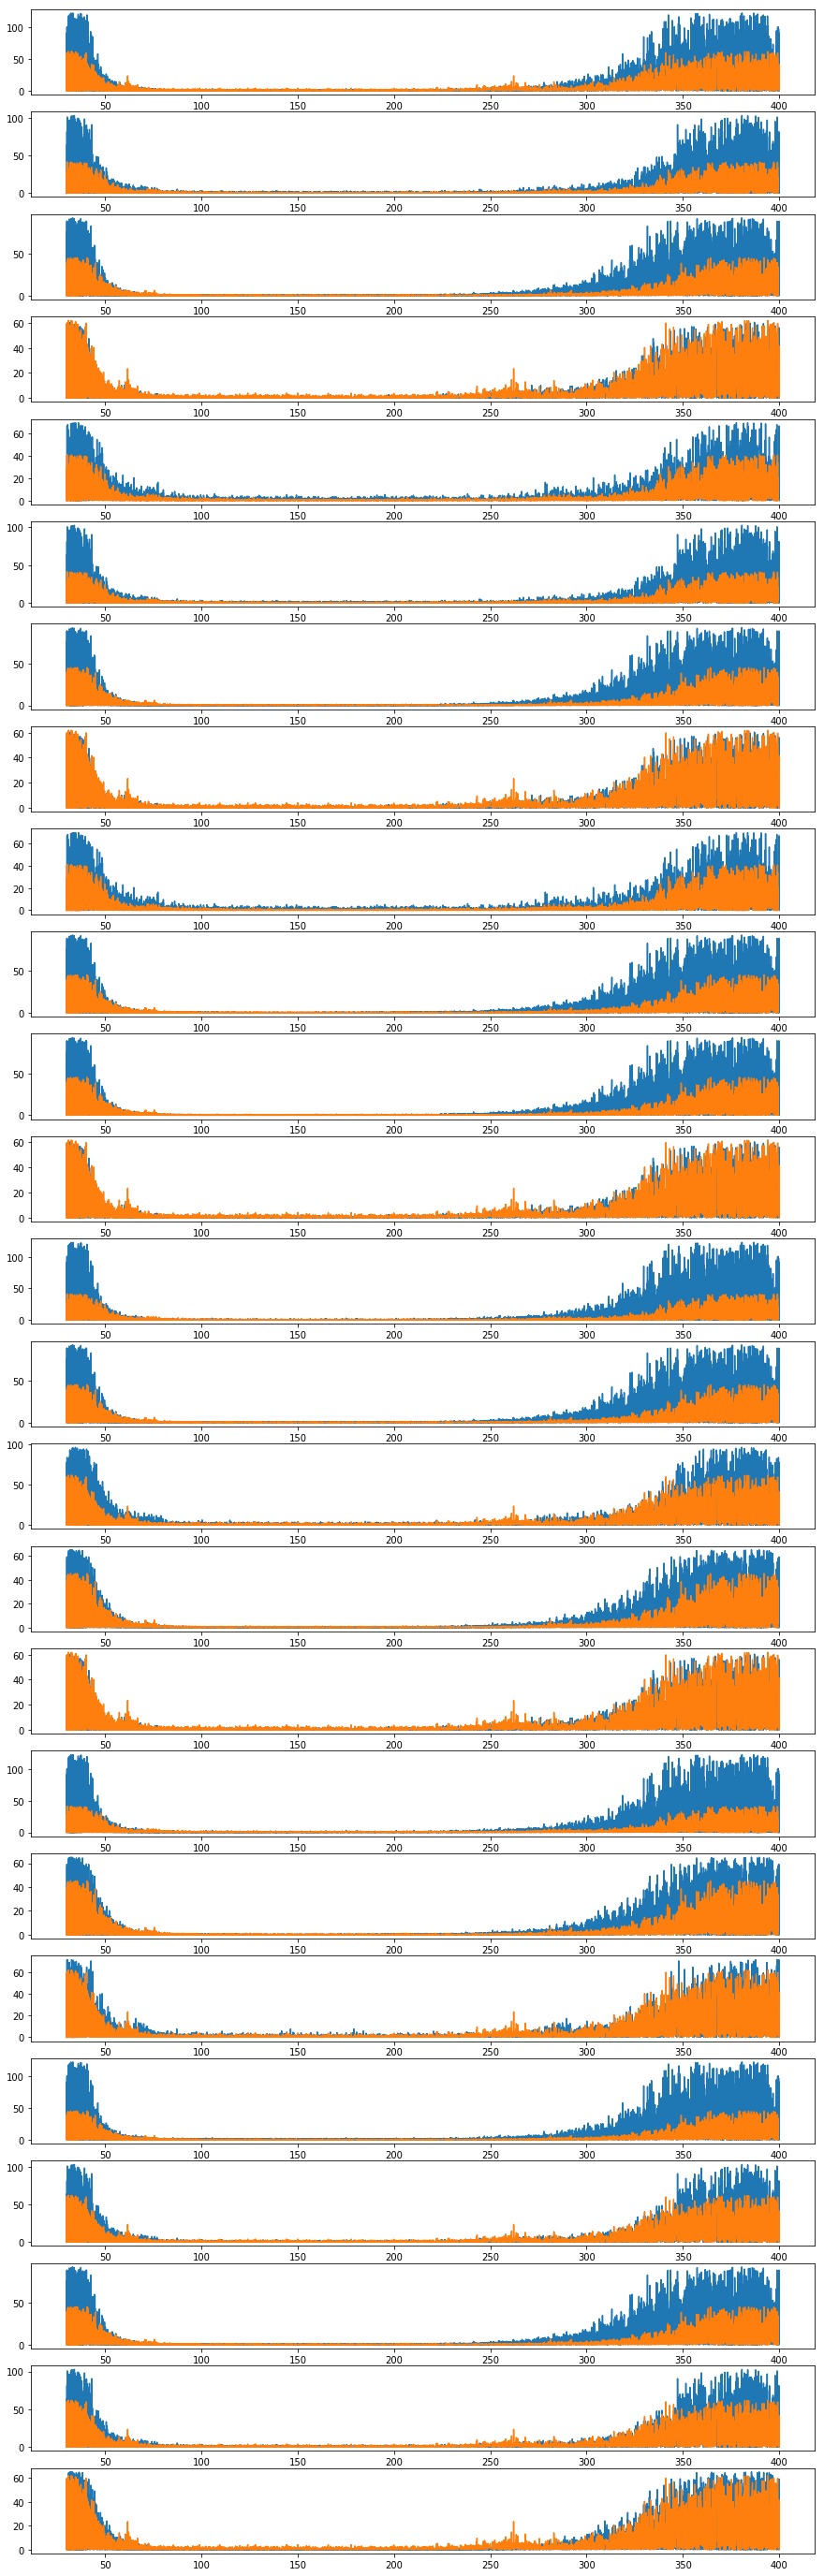

In [15]:
for i in range(25):
    print("")
for i in range(25):
    plt.subplot(25,1,i+1)
    plt.plot(X1[i][:,0],X1[i][:,1],X2[i][:,0],X2[i][:,1])
plt.gcf().set_size_inches(15,50)
plt.show()